# Optical Flow Implementation

#### Definition
 Optical flow can be defined as a $2D$ vector field which describes the movement of each pixel in the given video.

#### The Main Idea

To compute optical flow we take a video which will be represented as an ordered sequence of frames captured over time. From each frame we can get the intensity of pixels at specific coordinates. We aim to compute the apparent movement of each pixel between frames in both horizontal and vertical directions.

Python libraries

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

Let's define video path from which we want to compute optical flow

In [2]:
VIDEO_PATH = 'waterfall.mp4'

Here we define path where to store computed optical flow for future use

In [3]:
SAVE_PATH = 'waterfall.npy'

Now let's use cv2 library to read the video and capture frames

In [4]:
cap = cv2.VideoCapture(VIDEO_PATH)

we can get first frame from video. for that we will define two variables `ret` and `frame` where `ret` is a boolean which tells us if frame capture was successfull and `frame` is our desired matrix

In [5]:
ret, frame = cap.read()

print(f"Is Successfull: {ret}")
print(f"Frame: {frame}")

Is Successfull: True
Frame: [[[22 28 23]
  [22 28 23]
  [22 28 23]
  ...
  [32 47 36]
  [32 47 36]
  [32 47 36]]

 [[22 28 23]
  [22 28 23]
  [22 28 23]
  ...
  [32 47 36]
  [32 47 36]
  [32 47 36]]

 [[22 28 23]
  [22 28 23]
  [22 28 23]
  ...
  [32 47 36]
  [32 47 36]
  [32 47 36]]

 ...

 [[58 55 49]
  [58 55 49]
  [58 55 49]
  ...
  [96 83 74]
  [96 83 74]
  [96 83 74]]

 [[58 55 49]
  [58 55 49]
  [58 55 49]
  ...
  [96 83 74]
  [96 83 74]
  [96 83 74]]

 [[58 55 49]
  [58 55 49]
  [58 55 49]
  ...
  [96 83 74]
  [96 83 74]
  [96 83 74]]]


Lets display our first frame

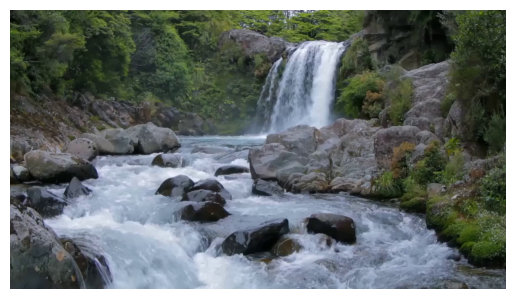

In [6]:
if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()
else:
    print("Failed to capture the first frame")

And we also need gray scale of our frame which can be retrived as follow

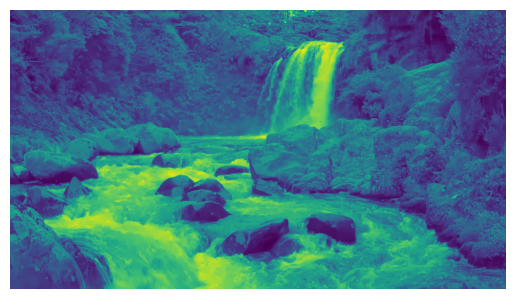

In [7]:
if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()
else:
    print("Failed to capture the first frame")

As we completed first steps now we can start calculating optical flow for each frame of the video.

To do that we create a list where we will store calculated optical flows.

In [8]:
optical_flows = []

For calculating optical flow we will use `cv2.calcOpticalFlowFarneback` method.

to use this method correctly we define variables for our computation:

- `pyr_scale` -> which specifies the image scale (<1) to build pyramids for each image
- `levels` -> Number of pyramid layers including the initial image
- `winsize` -> Average window size
- `iterations` -> Number of iterations the algorithm does at each pyramid level
- `poly_n` -> Size of the pixel neighborhood used to find polynomial expansion in each pixel
- `poly_sigma` -> Standard deviation of the Gaussian used to smooth derivatives used as a basis for the polynomial expansion
- `flags` -> Operation flags

In [9]:
pyr_scale = 0.5
levels = 3            
winsize = 7                
iterations = 10            
poly_n = 7                  
poly_sigma = 1.5            
flags = 0                   

Now we need to run through each frame and do the computations

In [10]:
prev_gray = None

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if prev_gray is not None:
        flow = cv2.calcOpticalFlowFarneback(
            prev_gray,
            gray,
            None,
            pyr_scale,
            levels,
            winsize,
            iterations,
            poly_n,
            poly_sigma,
            flags)
        
        optical_flows.append(flow)

    prev_gray = gray
    

And now we save our list to optical flows to file and we can use it in next steps of our project.

In [11]:
np.save(SAVE_PATH, optical_flows)

## References

- Chiang, Bryan, and Jeannette Bohg. Optical and Scene Flow. 2022.

- “OpenCV: Optical Flow.” Docs.opencv.org, docs.opencv.org/4.x/d4/dee/tutorial_optical_flow.html.